In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Computing Histogram
### Allows you to visualize the distribution of pixel intensities in an image

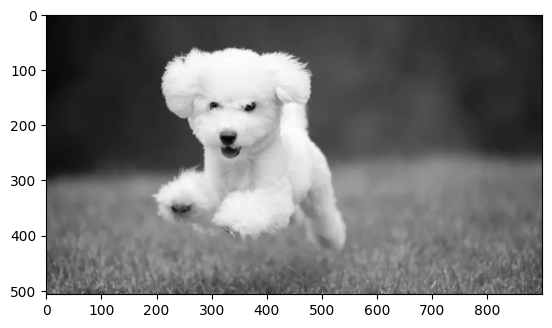

In [24]:
img = cv.imread("dog.jpeg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


# By default, plt.imshow() applies a colormap to the grayscale image, which can lead to what looks like an inverted color effect.
# The grayscale image values are mapped to a colormap, resulting in a colored image that may not represent the actual grayscale values correctly.
#To properly display a grayscale image, you should specify the colormap explicitly:
plt.imshow(gray,cmap='gray')

## Grayscale histogram

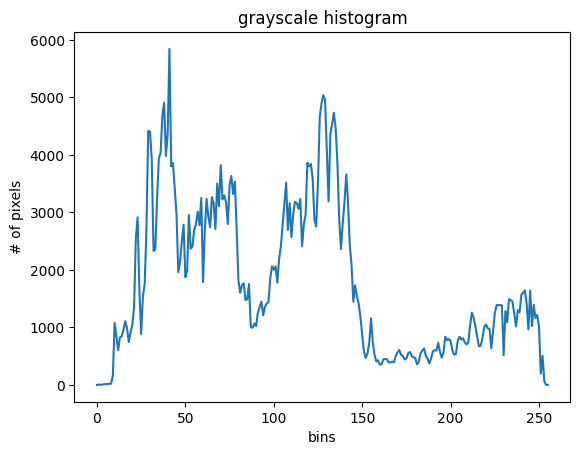

In [14]:
gray_hist = cv.calcHist([gray],[0],None,[256],[0,256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)

### Above graph shows that highest occuring pixel value is around 40 with frequency of 6000.
### Second highest peak lies between 100-150

## Compute Histogram on a mask

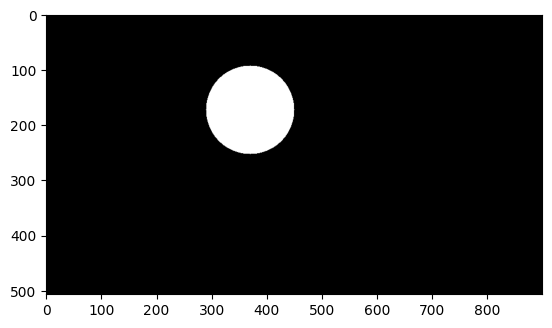

In [34]:
blank = np.zeros(img.shape[:2],dtype='uint8')
circle=cv.circle(blank,(img.shape[1]//2-80,img.shape[0]//2-80),80,255,-1)

plt.imshow(cv.cvtColor(circle, cv.COLOR_BGR2RGB))

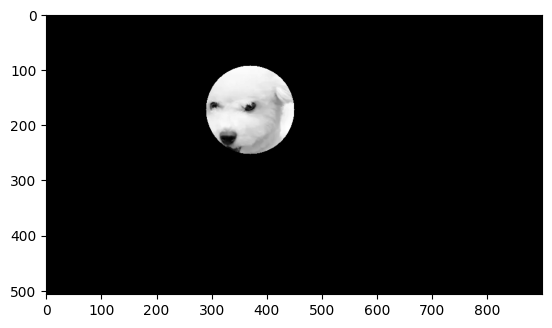

In [35]:
mask = cv.bitwise_and(gray,gray,mask=circle)
plt.imshow(mask,cmap="gray")

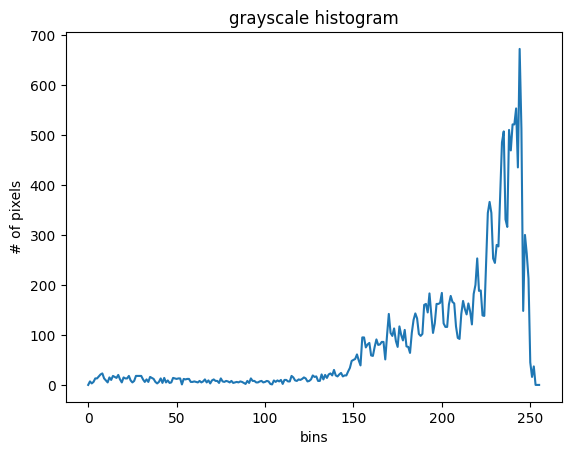

In [36]:
gray_hist = cv.calcHist([gray],[0],mask,[256],[0,256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)

## Compute a color histogram

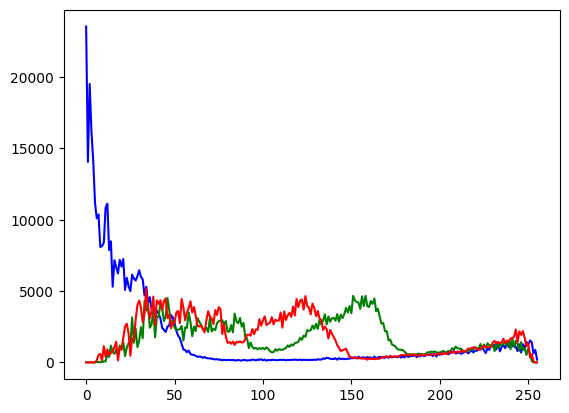

In [37]:
colors = ('b','g','r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)

plt.show()

## Compute a color histogram for masked image

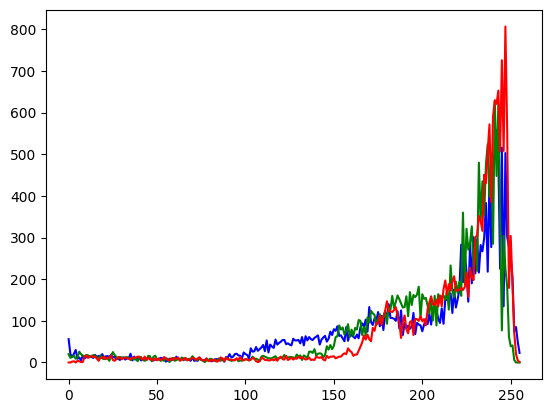

In [47]:
mcolor = cv.bitwise_and(img,img,mask=circle)
colors = ('b','g','r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.plot(hist,color=col)

plt.show()

# Thresholding